In [193]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import scipy.stats as stats

import utils
from utils.tests import *

In [194]:
_ = importlib.reload(utils.download)
_ = importlib.reload(utils.var)

In [195]:
data = pd.read_csv(".\\param\\data\\ropa.csv", index_col='Date', header=0)
data['returns'] = data.interpolate(type='linear').pct_change()
data.index = pd.to_datetime(data.index)

rtrs = list(data['returns'])
rtrs = rtrs[1:]
ts = range(len(rtrs))

# Metoda monte Carlo

In [196]:
model_t = pd.read_csv('.\\param\\data_distfit\\fitted_t.csv', index_col=0)[1:]
model_johnsonsu = pd.read_csv('.\\param\\data_distfit\\fitted_johnsonsu.csv', index_col=0)[1:]
model_genhyper = pd.read_csv('.\\param\\data_distfit\\fitted_genhyperbolic.csv', index_col=0)[1:]

model_t


,t_min,t_max,params,SSE,ecdf_quantiles,VaR_95,VaR_99,EVaR_95,EVaR_99
0,0,499,"(5.360464598578685, 0.002028062353721335, 0.02...",0.098780,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044278,0.071661,0.061933,0.092999
1,1,500,"(5.321771569906347, 0.0021115908063192882, 0.0...",0.105857,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044344,0.071808,0.062061,0.093280
2,2,501,"(5.288460197098301, 0.002026474527667888, 0.02...",0.101235,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044216,0.071732,0.061975,0.093308
3,3,502,"(5.241928798602011, 0.002006924283874679, 0.02...",0.107570,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044091,0.071651,0.061890,0.093352
4,4,503,"(5.169171410987285, 0.0019693762295206205, 0.0...",0.113074,"[-0.1306288805140844, -0.12126111859385258, -0...",0.043957,0.071636,0.061853,0.093576
...,...,...,...,...,...,...,...,...,...
293,293,792,"(18.46934189425143, 0.00019678092206142114, 0....",0.141359,"[-0.08235728377794271, -0.07925833692240081, -...",0.037519,0.055073,0.048392,0.064980
294,294,793,"(17.770366010399627, 0.00012607907540755143, 0...",0.139425,"[-0.08235728377794271, -0.07925833692240081, -...",0.037363,0.054965,0.048271,0.064951
295,295,794,"(17.73884167806812, 0.0001625987601562807, 0.0...",0.147290,"[-0.08235728377794271, -0.07925833692240081, -...",0.037403,0.055011,0.048315,0.065002
296,296,795,"(17.731184434662175, 0.00015986835169561135, 0...",0.145779,"[-0.08235728377794271, -0.07925833692240081, -...",0.037399,0.055008,0.048312,0.065000


In [197]:
def monte_carlo_method(data, MC, dist_model=stats.t, dist_str = 't'):
    params = data['params']

    n = len(params)

    VaR_95 = np.zeros(n)
    VaR_99 = np.zeros(n)

    EVaR_95 = np.zeros(n)
    EVaR_99 = np.zeros(n)

    for i in range(n):
        distribution = dist_model(*eval(params[i]))
        sample = distribution.rvs(size = MC)

        V95 = np.quantile(sample, .95)
        V99 = np.quantile(sample, .99)

        VaR_95[i] = V95
        VaR_99[i] = V99

        # EVaR_95[i] = stats.expectile(V95, .95) 
        # EVaR_99[i] = stats.expectile(V99, .95)
        part_95 = sample[sample > V95]
        part_99 = sample[sample > V99]

        EVaR_95[i] = np.mean(part_95)
        EVaR_99[i] = np.mean(part_99)

        

    data[f'VaR_95_MC_{dist_str}'] = VaR_95
    data[f'VaR_99_MC_{dist_str}'] = VaR_99

    data[f'EVaR_95_MC_{dist_str}'] = EVaR_95
    data[f'EVaR_99_MC_{dist_str}'] = EVaR_99


In [198]:
MC = 100000

In [199]:
monte_carlo_method(model_t, MC)
monte_carlo_method(model_genhyper, MC, stats.genhyperbolic, 'genhyperbolic')
monte_carlo_method(model_johnsonsu, MC, stats.johnsonsu, 'johnsonsu')

In [200]:
model_t

,t_min,t_max,params,SSE,ecdf_quantiles,VaR_95,VaR_99,EVaR_95,EVaR_99,VaR_95_MC_t,VaR_99_MC_t,EVaR_95_MC_t,EVaR_99_MC_t
0,0,499,"(5.360464598578685, 0.002028062353721335, 0.02...",0.098780,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044278,0.071661,0.061933,0.092999,0.044346,0.071125,0.061501,0.091430
1,1,500,"(5.321771569906347, 0.0021115908063192882, 0.0...",0.105857,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044344,0.071808,0.062061,0.093280,0.044549,0.073172,0.062598,0.095389
2,2,501,"(5.288460197098301, 0.002026474527667888, 0.02...",0.101235,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044216,0.071732,0.061975,0.093308,0.044564,0.073035,0.063024,0.095945
3,3,502,"(5.241928798602011, 0.002006924283874679, 0.02...",0.107570,"[-0.1306288805140844, -0.12126111859385258, -0...",0.044091,0.071651,0.061890,0.093352,0.044070,0.072441,0.062162,0.094006
4,4,503,"(5.169171410987285, 0.0019693762295206205, 0.0...",0.113074,"[-0.1306288805140844, -0.12126111859385258, -0...",0.043957,0.071636,0.061853,0.093576,0.043674,0.070873,0.061271,0.092513
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,293,792,"(18.46934189425143, 0.00019678092206142114, 0....",0.141359,"[-0.08235728377794271, -0.07925833692240081, -...",0.037519,0.055073,0.048392,0.064980,0.037669,0.055322,0.048665,0.065364
294,294,793,"(17.770366010399627, 0.00012607907540755143, 0...",0.139425,"[-0.08235728377794271, -0.07925833692240081, -...",0.037363,0.054965,0.048271,0.064951,0.037548,0.055625,0.048528,0.065316
295,295,794,"(17.73884167806812, 0.0001625987601562807, 0.0...",0.147290,"[-0.08235728377794271, -0.07925833692240081, -...",0.037403,0.055011,0.048315,0.065002,0.037378,0.054608,0.048078,0.064588
296,296,795,"(17.731184434662175, 0.00015986835169561135, 0...",0.145779,"[-0.08235728377794271, -0.07925833692240081, -...",0.037399,0.055008,0.048312,0.065000,0.037353,0.055594,0.048459,0.065384


* ### $VaR_{95}$ i $VaR_{99}$

In [201]:
model = [model_t, model_genhyper, model_johnsonsu]
model_str = ['t', 'genhyperbolic', 'johnsonsu']

In [202]:
def plot_vars(df, distr, data=rtrs, show=True,  save=False, name=''):
    plt.figure(figsize=(8*2, 6))

    ts = range(len(data))
    plt.plot(ts, data)
    plt.axvline(499, color='k')

    ts1 = df['t_max']
    v95 = df[f'VaR_95_MC_{distr}']
    v99 = df[f'VaR_99_MC_{distr}']

    plt.plot(ts1, v95, label=r'$VaR_{95}$')
    plt.plot(ts1, v99,label=r'$VaR_{99}$')

    plt.title(f'VaR metodą Monte Carlo - rozkład {distr}')
    plt.legend()
    if save:
        plt.savefig(name)
    if show:
        plt.show()


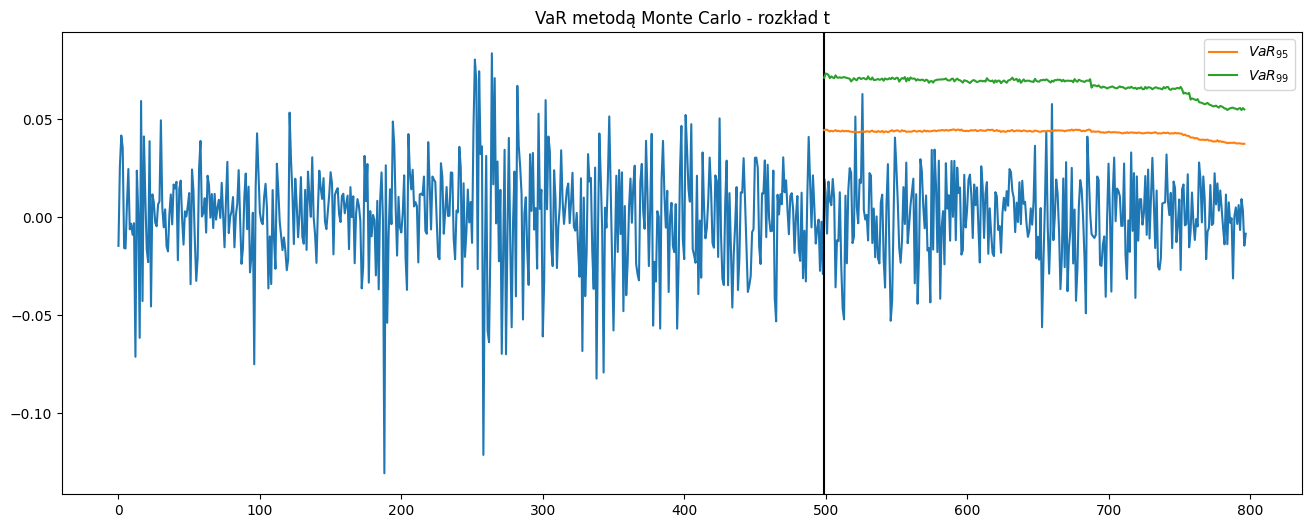

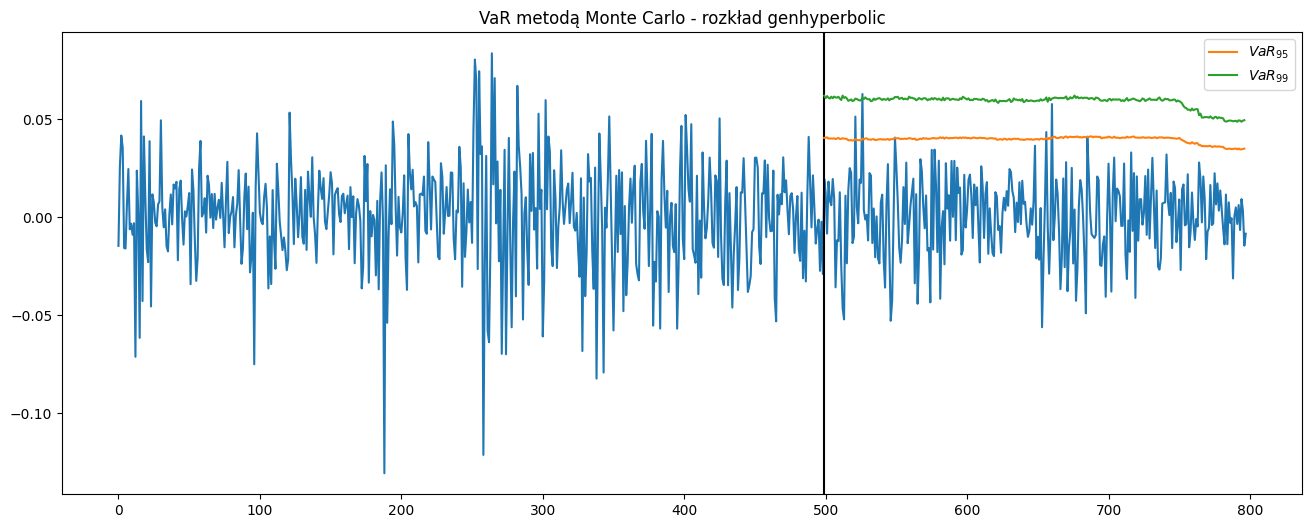

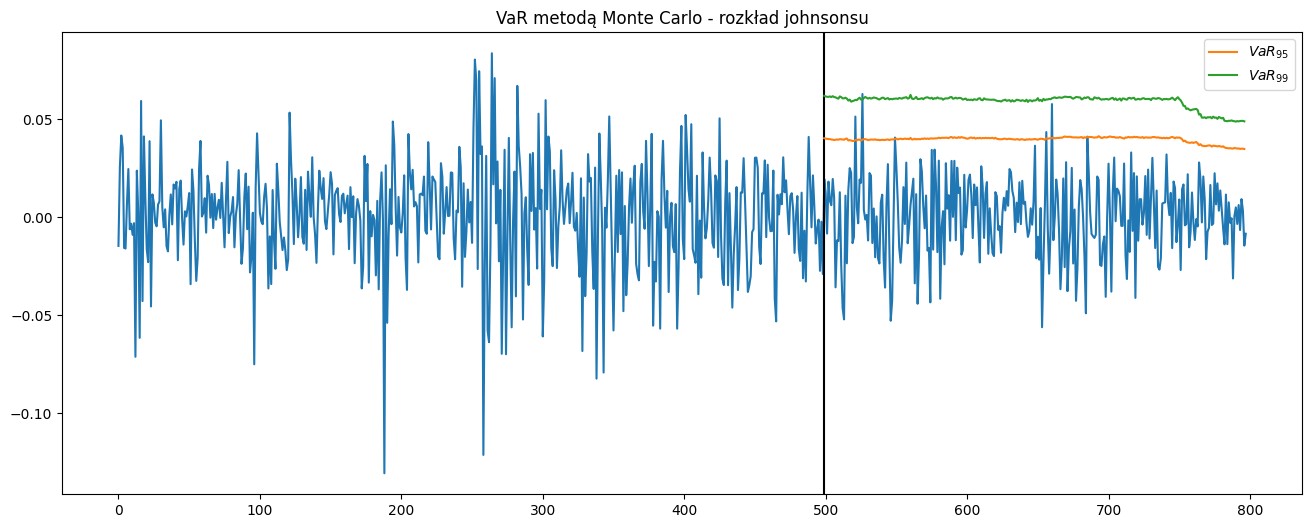

In [203]:
for i in range(len(model)): # wydaja mi sie te wykresy mniej wazne
    savename = './mc_fics/VaR/{}.png'.format(model_str[i])
    plot_vars(model[i], model_str[i], save=True, name = savename)

In [204]:
def compare_var(df, distr, show=True, save=False, name=''):
    plt.figure(figsize=(16, 6))  

    ts1 = df['t_max']
    v95 = df[f'VaR_95_MC_{distr}']
    v99 = df[f'VaR_99_MC_{distr}']

    plt.plot(ts1, v95, label=r'$VaR_{95}$ - metoda MC', c='#1f77b4')
    plt.plot(ts1, v99, label=r'$VaR_{99}$ - metoda MC', c='#2ca02c')

    p_v_95 = df['VaR_95']
    p_v_99 = df['VaR_99']

    plt.plot(ts1, p_v_95, label=r'$VaR_{95}$ - metoda parametryczna', c='#d62728' , alpha=0.8)
    plt.plot(ts1, p_v_99, label=r'$VaR_{99}$ - metoda parametryczna', c='#ff7f0e', alpha=0.8)

    plt.title(f'Porównanie metody MC i metody parametrycznej - rozkład {distr}')
    plt.legend()

    if save:
        plt.savefig(name)
    if show:
        plt.show()


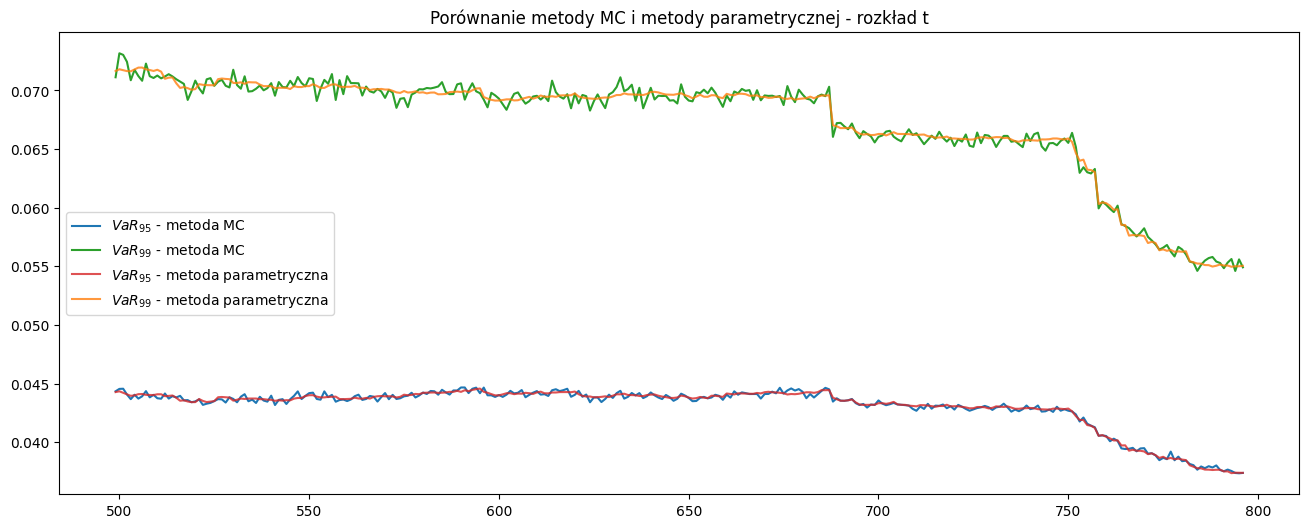

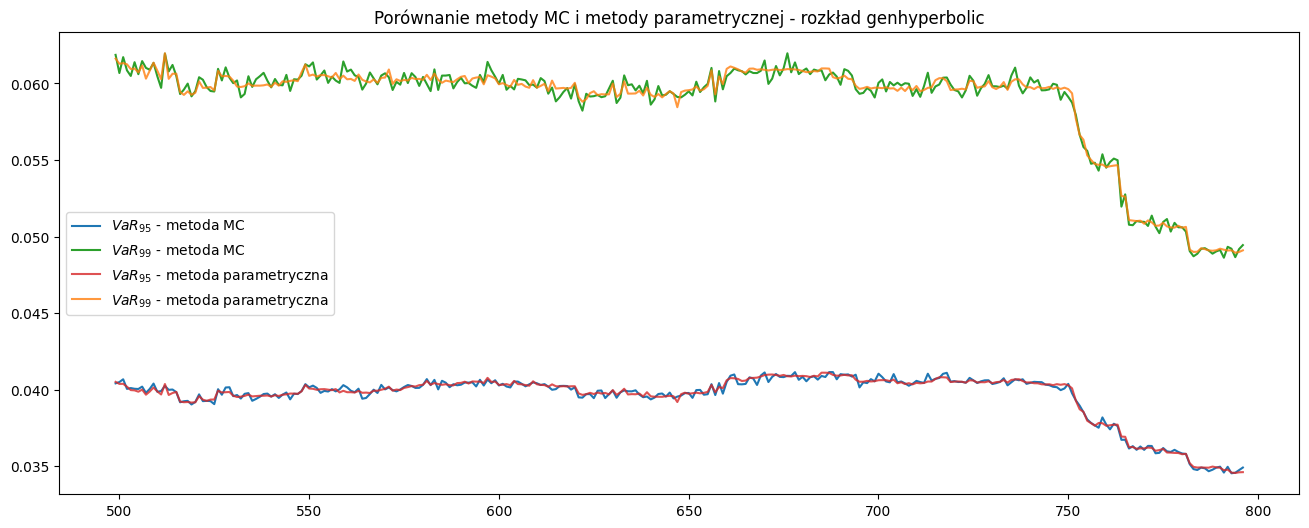

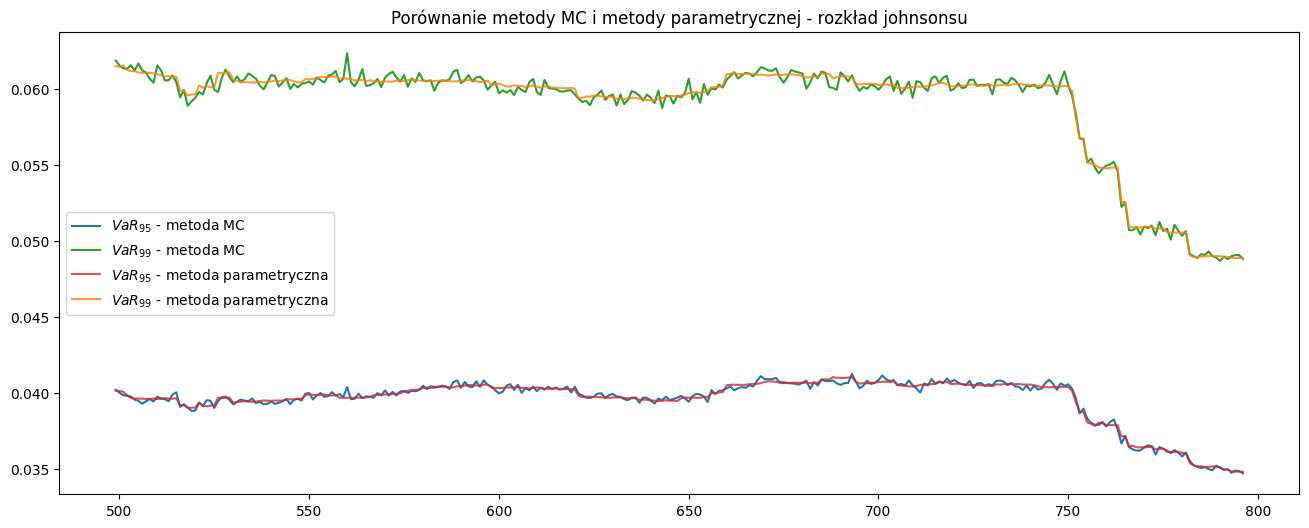

In [205]:
for i in range(len(model)): # turbo wazne wykresy
    savename = './mc_fics/VaR/porownanie_{}.png'.format(model_str[i])
    compare_var(model[i], model_str[i], save=True, name = savename)

In [206]:
def convergence(data, MC, model_dist, distr): # zbieganie na przykładzie okienka nr 0
    n = len(MC)
    result_95 = np.zeros(n)
    result_99 = np.zeros(n)

    for i in range(n):
        monte_carlo_method(data, MC[i], model_dist, distr)

        v_95 = data[f'VaR_95_MC_{distr}'][0]
        v_99 = data[f'VaR_99_MC_{distr}'][0]

        p_v_95 = data['VaR_95'][0]
        p_v_99 = data['VaR_99'][0]
        
        # result_95[i] = (p_v_95 - v_95)**2
        # result_99[i] = (p_v_95 - v_95)**2
    
        result_95[i] = np.abs(p_v_95 - v_95)
        result_99[i] = np.abs(p_v_95 - v_95)

    return result_95, result_99

In [207]:
# def convergence_plot(df, MC, st_model, distr, show=True, save=False, name=''):
#     plt.figure(figsize=(16, 6))  

#     res_95, res_99 = convergence(df, MC, st_model, distr)

#     plt.plot(MC, res_95, label=r'$Error_{95}$')
#     plt.plot(MC, res_99, label=r'$Error_{99}$', alpha = 0.7)


#     plt.title(f'Błąd - rozkład {distr}')
#     plt.legend()
#     plt.xlabel('Wielkosc próbki')
#     plt.ylabel("Błąd")


#     if save:
#         plt.savefig(name)
#     if show:
#         plt.show()



In [208]:
# st_model = [stats.t, stats.genhyperbolic, stats.johnsonsu]
# MC = np.arange(10, 10000, 1000)

In [209]:
# for i in range(len(model)): 
#     savename = './mc_fics/VaR/mse_{}.png'.format(model_str[i])
#     convergence_plot(model[i], MC, st_model[i], model_str[i], save=True, name = savename)

# mysle ze moznna te wtkresy dac, ja jedynie zeby nie smiecic sobie data frame to je zakomentowałam

* ### $EVaR_{95}$ i $EVaR_{99}$

In [210]:
def plot_vars_evars(df, distr, data=rtrs, show=True,  save=False, name=''):
    plt.figure(figsize=(8*2, 6))

    ts = range(len(data))
    plt.plot(ts, data)
    plt.axvline(499, color='k')

    ts1 = df['t_max']
    v95 = df[f'VaR_95_MC_{distr}']
    v99 = df[f'VaR_99_MC_{distr}']

    ev95 = df[f'EVaR_95_MC_{distr}']
    ev99 = df[f'EVaR_99_MC_{distr}']

    plt.plot(ts1, v95, label=r'$VaR_{95}$')
    plt.plot(ts1, v99,label=r'$VaR_{99}$')
    
    plt.plot(ts1, ev95, label=r'$EVaR_{95}$')
    plt.plot(ts1, ev99,label=r'$EVaR_{99}$')

    plt.title(f'VaR i EVaR metodą Monte Carlo - rozkład {distr}')
    plt.legend()
    if save:
        plt.savefig(name)
    if show:
        plt.show()

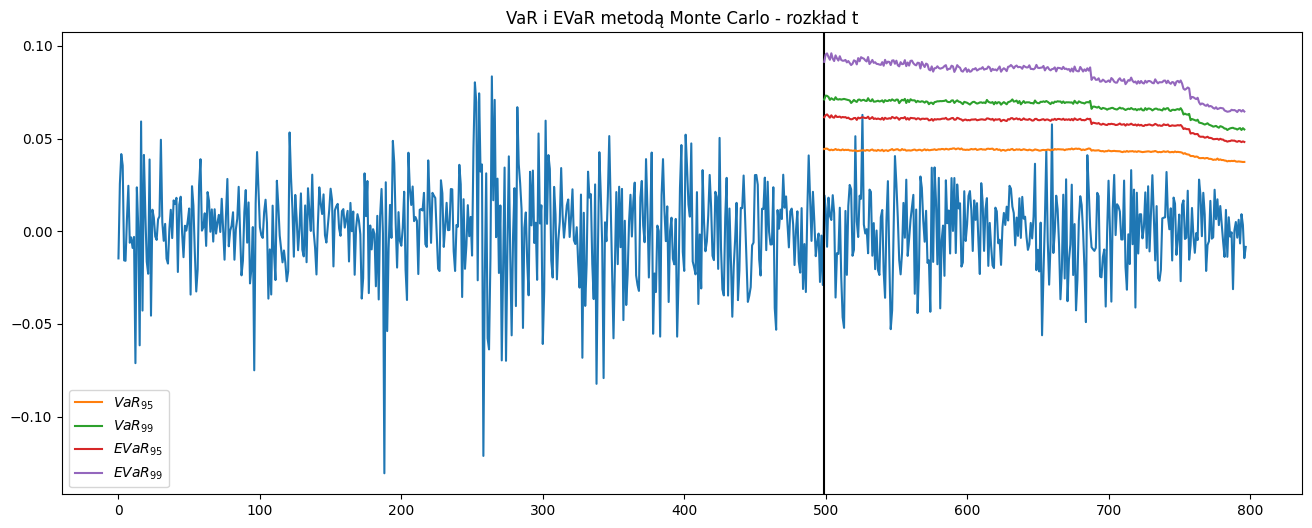

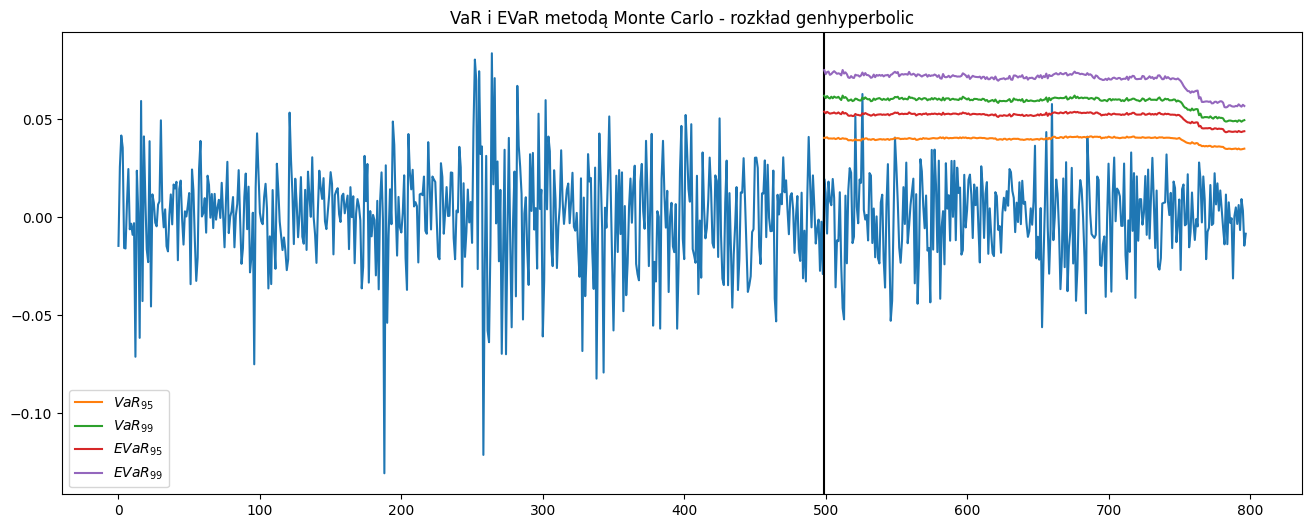

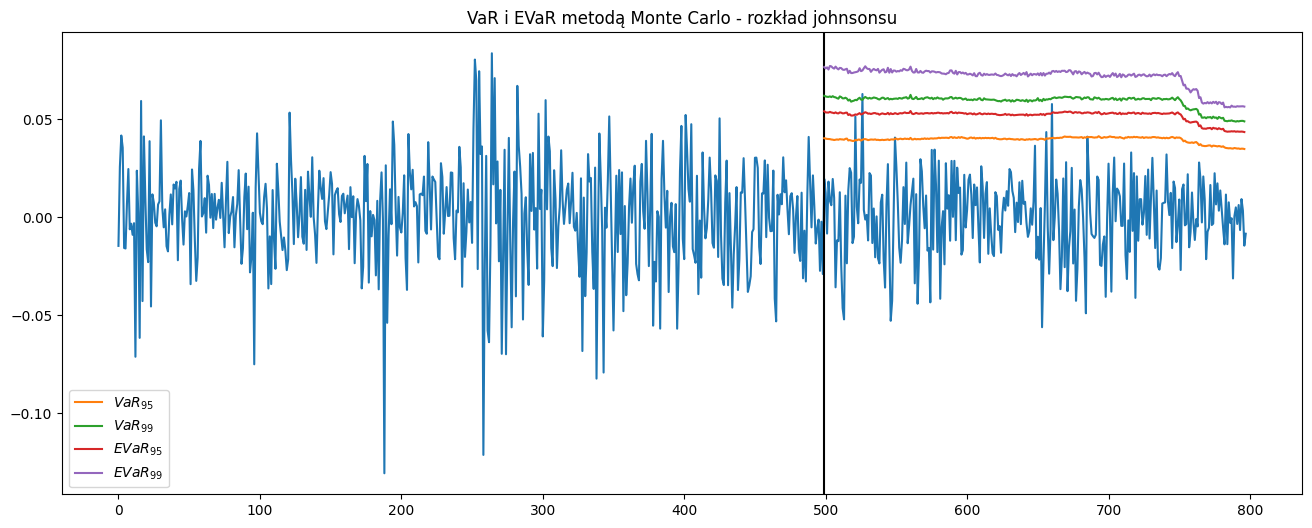

In [211]:
for i in range(len(model)): # wydaja mi sie te wykresy mniej wazne
    savename = './mc_fics/EVaR/{}.png'.format(model_str[i])
    plot_vars_evars(model[i], model_str[i], save=True, name = savename)

In [212]:
def compare_evar(df, distr, show=True, save=False, name=''):
    plt.figure(figsize=(16, 6))  

    ts1 = df['t_max']
    ev95 = df[f'EVaR_95_MC_{distr}']
    ev99 = df[f'EVaR_99_MC_{distr}']

    plt.plot(ts1, ev95, label=r'$VaR_{95}$ - metoda MC', c='#1f77b4')
    plt.plot(ts1, ev99, label=r'$VaR_{99}$ - metoda MC', c='#2ca02c')

    p_ev_95 = df['EVaR_95']
    p_ev_99 = df['EVaR_99']

    plt.plot(ts1, p_ev_95, label=r'$EVaR_{95}$ - metoda parametryczna', c='#d62728' , alpha=0.8)
    plt.plot(ts1, p_ev_99, label=r'$EVaR_{99}$ - metoda parametryczna', c='#ff7f0e', alpha=0.8)

    plt.title(f'Porównanie metody MC i metody parametrycznej - rozkład {distr}')
    plt.legend()

    if save:
        plt.savefig(name)
    if show:
        plt.show()


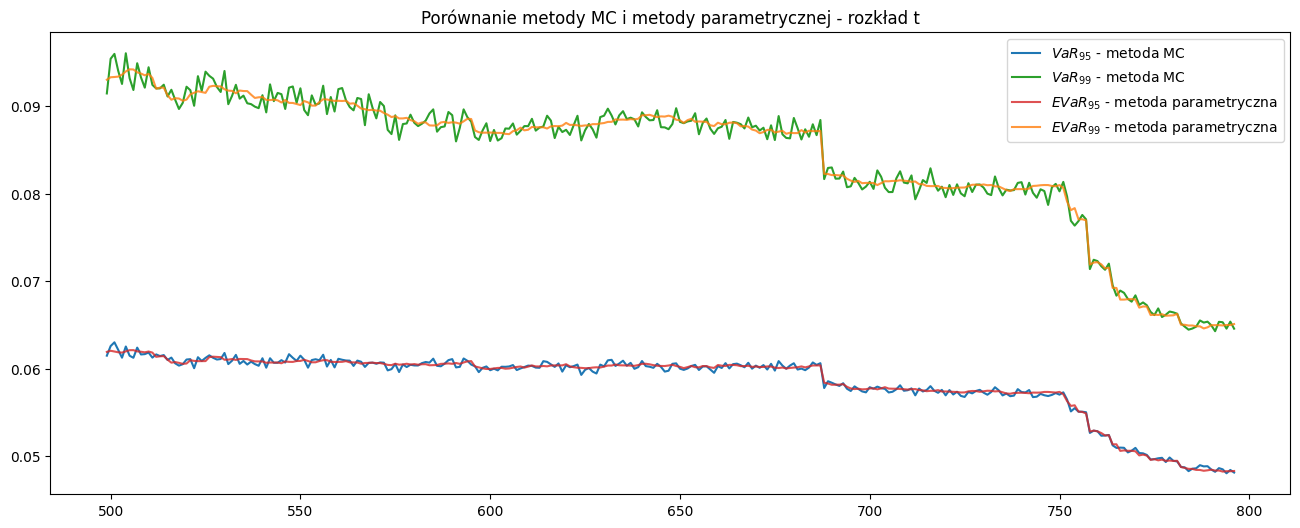

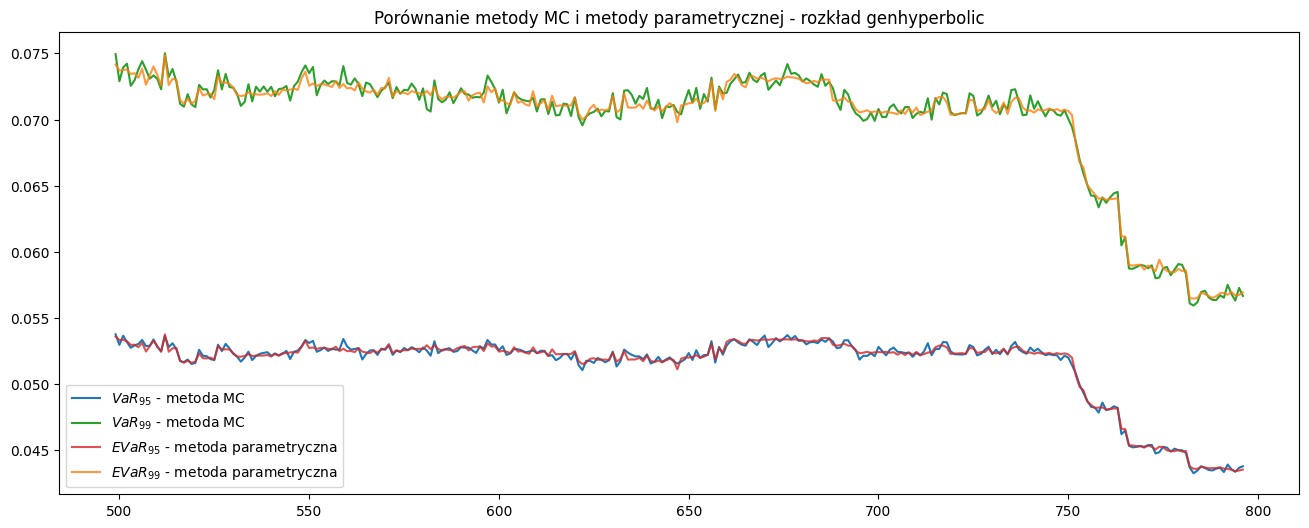

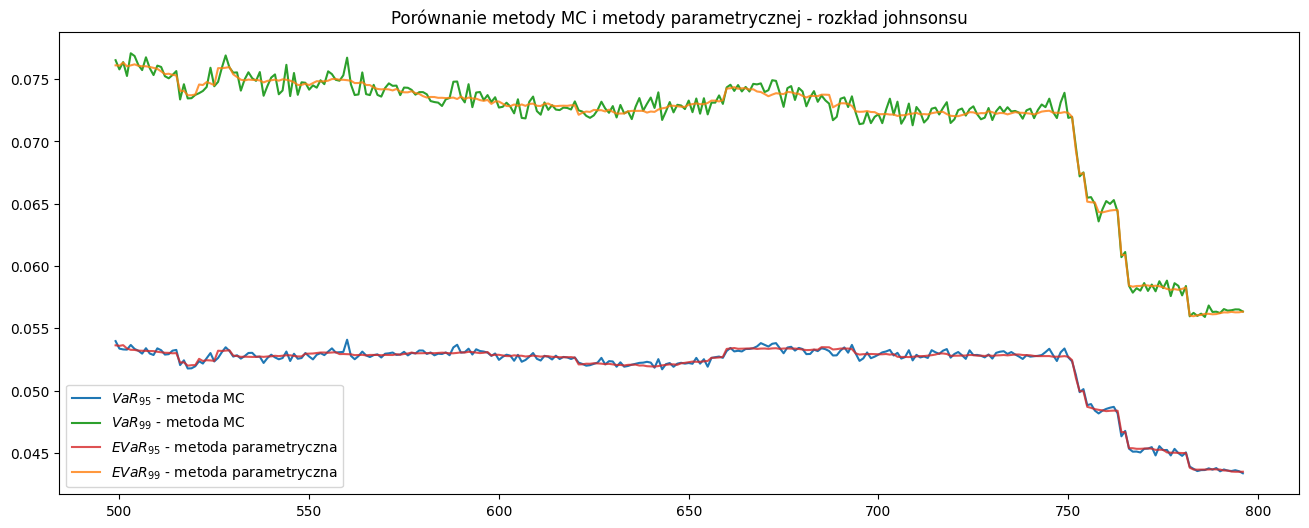

In [213]:
for i in range(len(model)): # turbo wazne wykresy
    savename = './mc_fics/EVaR/porownanie_{}.png'.format(model_str[i])
    compare_evar(model[i], model_str[i], save=True, name = savename)

# **Backtesting**

In [214]:
r_test = rtrs[-298:]

In [215]:
def summary_backtesting(df, r_test=r_test, pr=True, name_str='t'):
    v95 = df[f'VaR_95_MC_{name_str}']
    v99 = df[f'VaR_99_MC_{name_str}']
    ev95 = df[f'VaR_95_MC_{name_str}']
    ev99 = df[f'VaR_99_MC_{name_str}']
    I_95 = []
    I_99 = []
    for i in range(len(r_test)):
        I_95.append(v95[i] < r_test[i])
        I_99.append(v99[i] < r_test[i])
    t = '       '
    res = {}
    res['Ku95'] = kupiec(np.array(I_95), .95)
    res['Ku99'] = kupiec(np.array(I_99), .99)
    if sum(I_95) != 0:
        res['Ch95'] = christoffersen(np.array(I_95))
    else: res['Ch95']= None
    if sum(I_99) != 0:
        res['Ch99'] = christoffersen(np.array(I_99))
    else: res['Ch99']= None
    res['Sc95'] = np.mean(scoring_quantile(r_test, v95, .95))
    res['Sc99'] = np.mean(scoring_quantile(r_test, v99, .99))
    res['ESc95'] = np.mean(scoring_expectile(r_test, ev95, .95))
    res['ESc99'] = np.mean(scoring_expectile(r_test, ev99, .99))
    
    if pr:
        print('VaR_95:')
        print(t,' Kupiec:', res['Ku95'])
        print(t,'Christ.:', res['Ch95'])
        print(t,'Scoring:', )
        print('VaR_99:')
        print(t,' Kupiec:', res['Ku99'])
        print(t,'Christ.:', res['Ch99'])
        print(t,'Scoring:', np.mean(scoring_quantile(r_test, v99, .099)))
        print('EVaR_95:')
        print(t,'Scoring:', np.mean(scoring_expectile(r_test, ev95,.95)))
        print('EVaR_99:')
        print(t,'Scoring:', np.mean(scoring_expectile(r_test, ev99,.99)))
    return(res)


In [216]:
dst = (
"t", 
"genhyperbolic" ,
"johnsonsu"  )

results_df=pd.DataFrame()

for i in range(len(model)):
    print(f'\n\nRozkład:  {dst[i]}')

    a = summary_backtesting(model[i], name_str = dst[i])
    b =pd.DataFrame.from_dict(a, orient='index',columns=[dst[i]])
    results_df = pd.concat([results_df, b.transpose()], ignore_index=False)




Rozkład:  t
VaR_95:
         Kupiec: 0.0001276037136812569
        Christ.: 0.839492577936688
        Scoring:
VaR_99:
         Kupiec: 0.014387200998173477
        Christ.: None
        Scoring: 0.060193073342380846
EVaR_95:
        Scoring: 0.00011242113635773867
EVaR_99:
        Scoring: 4.880512636198912e-05


Rozkład:  genhyperbolic
VaR_95:
         Kupiec: 0.007447710138538399
        Christ.: 0.6492634807020252
        Scoring:
VaR_99:
         Kupiec: 0.18099777733592193
        Christ.: 0.9946240358584997
        Scoring: 0.052558801309792534
EVaR_95:
        Scoring: 9.955549954980276e-05
EVaR_99:
        Scoring: 3.8136458606485194e-05


Rozkład:  johnsonsu
VaR_95:
         Kupiec: 0.007447710138538399
        Christ.: 0.6492634807020252
        Scoring:
VaR_99:
         Kupiec: 0.18099777733592193
        Christ.: 0.9946240358584997
        Scoring: 0.05273701097648557
EVaR_95:
        Scoring: 9.950894521189138e-05
EVaR_99:
        Scoring: 3.8366389694472877e-05


In [217]:
results_df.transpose()

,t,genhyperbolic,johnsonsu
Ku95,0.000128,0.007448,0.007448
Ku99,0.014387,0.180998,0.180998
Ch95,0.839493,0.649263,0.649263
Ch99,NaN,0.994624,0.994624
Sc95,0.002266,0.002151,0.002154
Sc99,0.000668,0.000594,0.000595
ESc95,0.000112,0.000100,0.000100
ESc99,0.000049,0.000038,0.000038


In [218]:
filename = './param/data/backtesting.csv'
data_parametric = pd.read_csv(filename, index_col=0)

In [226]:
data_parametric.transpose()[np.array(dst)] # dla porownania 

,t,genhyperbolic,johnsonsu
Ku95,0.000128,0.007448,0.007448
Ku99,0.014387,0.180998,0.180998
Ch95,0.839493,0.649263,0.649263
Ch99,NaN,0.994624,0.994624
Sc95,0.002266,0.002148,0.002151
Sc99,0.000668,0.000594,0.000594
ESc95,0.000189,0.000151,0.000152
ESc99,0.000075,0.000052,0.000055
